### Load data

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# data_df = pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/Data/combined_rest_health.csv')
data_df = pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/Data/combined_rest_health_0331_filtered.csv')
data_df_append = pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/Data/combined_rest_health_0409.csv')

In [ ]:
data_df.reset_index(drop=True, inplace=True)

In [ ]:
data_df

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review..."
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T..."
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (..."
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.0,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,See all 1453 photos,True,True,False,24.0,NaN,"[""Glad to see this old Hollywood style diner s..."
4,6TH STREET MARKET,212 W 6TH ST,LOS ANGELES,FA0056707,CA,90014,OW0030295,"FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK",91.285714,"F033,F044,F030,F032,F046,F006,F046,F023,F014,F...",# 33. Nonfood-contact surfaces clean and in go...,food market,"25-1,999 SF",MODER,84,3874,https://www.yelp.com/biz/6th-street-market-los...,6th Street Market,"212 W 6th St Space 212 Los Angeles, CA 90014",3.0,23 reviews,$,"Grocery, Delis",NaN,Amenities and More\nNo Reservations\nNo Delive...,NaN,212 W 6th St Space 212 Los Angeles,CA,90014,Los Angeles,Add photo or video,False,True,False,7.0,NaN,"[""Hello Yelp!\n\nI've been coming to this mark..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,ZAMORA BROS. MEAT MARKET,1559 W PICO BLVD,LOS ANGELES,FA0055579,CA,90015,OW0022153,RESTAURANT (0-30) SEATS HIGH RISK,94.541667,"F036,F040,F023,F033,F037,F030,F026,F032,F044,F...","# 3

### Preprocessing and encoding

bin the inspection scores

In [ ]:
data_df['SCORE'].isnull().sum()

0

In [ ]:
cols_to_drop = []
for col in data_df.columns:
    if 'Unnamed' in col:
        cols_to_drop.append(col)
data_df.drop(columns=cols_to_drop, inplace=True)
data_df.drop(columns=['url.1'], inplace=True)

In [ ]:
data_df.columns

Index(['FACILITY_NAME', 'FACILITY_ADDRESS', 'FACILITY_CITY', 'FACILITY_ID',
       'FACILITY_STATE', 'FACILITY_ZIP', 'OWNER_ID', 'PE_DESCRIPTION', 'SCORE',
       'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'type', 'size', 'risk_level',
       'ID', 'restaurant_id', 'url', 'name', 'address', 'score',
       'review_counts', 'price', 'category', 'open_time', 'amenities',
       'open_hours_week', 'new_address', 'state', 'zipcode', 'city',
       'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions', 'comments_list'],
      dtype='object')

In [ ]:
# cut the scores into 3 bins
data_df['binned_score'] = pd.cut(data_df.SCORE, 3,labels=['low','medium','high'])
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",high
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.0,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,See all 1453 photos,True,True,False,24.0,NaN,"[""Glad to see this old Hollywood style diner s...",high
4,6TH STREET MARKET,212 W 6TH ST,LOS ANGELES,FA0056707,CA,90014,OW0030295,"FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK",91.285714,"F033,F044,F030,F032,F046,F006,F046,F023,F014,F...",# 33. Nonfood-contact surfaces clean and in go...,food market,"25-1,999 SF",MODER,84,3874,https://www.yelp.com/biz/6th-street-market-los...,6th Street Market,"212 W 6th St Space 212 Los Angeles, CA 90014",3.0,23 reviews,$,"Grocery, Delis",NaN,Amenities and More\nNo Reservations\nNo Delive...,NaN,212 W 6th St Space 212 Los Angeles,CA,90014,Los Angeles,Add photo or video,False,True,False,7.0,NaN,"[""Hello Yelp!\n\nI've been coming to this mark...",high


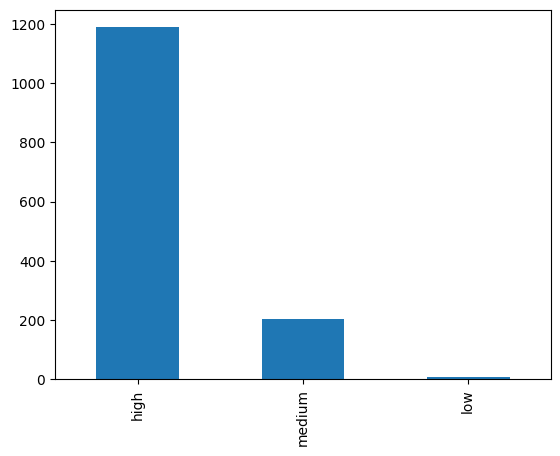

In [ ]:
data_df['binned_score'].value_counts().plot.bar()
plt.show()

In [ ]:
data_df['binned_score'].value_counts()

high      1188
medium     202
low          7
Name: binned_score, dtype: int64

check type

In [ ]:
data_df['type'].isnull().sum()

0

In [ ]:
data_df['type'].value_counts()

restaurant     1348
food market      48
other             1
Name: type, dtype: int64

In [ ]:
# drop the markets
data_df = data_df[data_df['type']!='food market']

In [ ]:
# drop other
data_df = data_df[data_df['type']!='other']

check size

In [ ]:
data_df['size'].isnull().sum()

0

In [ ]:
data_df['size'].value_counts()

0-30      613
31-60     372
61-150    287
151 +      76
Name: size, dtype: int64

In [ ]:
# data_df['coded_size'] = size_le.transform(data_df['size'])
# data_df.head()
size_map = {'0-30':0, '31-60':1, '61-150':2, '151 + ':2}
data_df['coded_size'] = data_df['size'].map(lambda x:size_map[x])
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high,0
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high,2
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",high,0
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.0,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,See all 1453 photos,True,True,False,24.0,NaN,"[""Glad to see this old Hollywood style diner s...",high,1
5,71 ABOVE,633 W 5TH ST # 7100,LOS ANGELES,FA0225306,CA,90071,OW0229647,RESTAURANT (151 + ) SEATS HIGH RISK,93.565217,"F033,F036,F006,F034,F038,F044,F039,F043,F025,F...",# 33. Nonfood-contact surfaces clean and in go...,restaurant,151 +,HIGH,217,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.5,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,See all 8236 photos,True,True,False,35.0,See all 138 questions,"['Great food, great ambiance and views. Overal...",high,2


transform yelp score

In [ ]:
data_df['score'].isnull().sum()

16

In [ ]:
mode_score = data_df['score'].mode()[0]
mode_score

4.0

In [ ]:
data_df['score'].fillna(value=mode_score, inplace=True)
data_df['score'].isnull().sum()

transform review_counts

In [ ]:
data_df['review_counts'].isnull().sum()

16

In [ ]:
def code_review_counts(x):
    if not pd.isnull(x):
        x = x.strip('(')
        x = x.strip(')')
        x = x.strip(' reviews')
        if 'k' in x:
            x = x.strip('k')
            x = float(x) * 1000
        else:
            x = float(x)
    else:
        return None
    return x

In [ ]:
null_value = data_df[data_df['review_counts'].isnull()]['review_counts'].values[0]
pd.isnull(null_value)

True

In [ ]:
# data_df[~data_df['review_counts'].isnull()]['review_counts'].apply(lambda x:x.strip(' reviews'))
data_df['coded_review_counts'] = data_df['review_counts'].apply(lambda x:code_review_counts(x)).astype(float)

In [ ]:
data_df.sample(3)

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts
967,PARIS BAKERY AND CAFE,205 S MEDNIK AVE,LOS ANGELES,FA0250931,CA,90022-1607,OW0244933,RESTAURANT (0-30) SEATS HIGH RISK,87.000000,"F034,F044,F037,F035,F043,F042,F036,F030,F033,F...","# 34. Warewashing facilities: Adequate, mainta...",restaurant,0-30,HIGH,8904,3180,https://www.yelp.com/biz/paris-bakery-and-cafe...,Paris Bakery and Cafe,"205 S Mednik Ave Los Angeles, CA 90022",4.5,60 reviews,$,"Bakeries, Desserts, Mexican",Mon\n7:00 AM - 8:00 PM\nTue\n7:00 AM - 8:00 PM...,Amenities and More\nHealth ScoreA\nOffers Take...,78.0,205 S Mednik Ave Los Angeles,CA,90022,Los Angeles,See all 133 photos,False,True,False,15.0,NaN,"[""I've been coming to Paris Bakery & Cafe for ...",medium,0,60.0
629,KASTURI RESTAURANT AND MARKET,3580 W 3RD ST,LOS ANGELES,FA0251333,CA,90020-2013,OW0245283,RESTAURANT (0-30) SEATS HIGH RISK,90.538462,"F007,F033,F042,F030,F039,F006,F044,F007,F033,F...",# 07. Proper hot and cold holding temperatures...,restaurant,0-30,HIGH,5873,4407,https://www.yelp.com/biz/kasturi-halal-meat-an...,Kasturi Halal Meat & Grocery,"3580 W 3rd St Los Angeles, CA 90020",4.0,37 reviews,$,"Indian, Halal, Bangladeshi",Mon\n8:00 AM - 11:00 PM\nTue\n8:00 AM - 11:00 ...,Amenities and More\nHealth ScoreB\nOffers Deli...,104.0,3580 W 3rd St Los Angeles,CA,90020,Los Angeles,See all 74 photos,False,True,False,11.0,See all 2 questions,"[""Bomb biryani-for $5 that's a steal in LA! Th...",high,0,37.0
454,FRANKIES,7228 MELROSE AVE,LOS ANGELES,FA0023760,CA,90046,OW0025413,RESTAURANT (61-150) SEATS HIGH RISK,91.350000,"F007,F014,F058,F016,F033,F035,F044,F034,F058,F...",# 07. Proper hot and cold holding temperatures...,restaurant,61-150,HIGH,4231,1669,https://www.yelp.com/biz/frankies-los-angeles-...,Frankie's,"7228 Melrose Ave Los Angeles, CA 90046",4.0,488 reviews,$$,Italian,Mon\r\n12:00 PM - 12:00 AM (Next day)\r\nTue\r...,Amenities and More\r\nHealth ScoreA\r\nTakes R...,NaN,7228 Melrose Ave Los Angeles,CA,90046,Los Angeles,See all 337 photos,True,True,False,25.0,See all 2 questions,['went for the first time on my birthday and t...,high,2,488.0
1195,SUSTAIN A BOWL,8338 LINCOLN BLVD,LOS ANGELES,FA0259089,CA,90045,OW0251160,RESTAURANT (0-30) SEATS HIGH RISK,91.000000,"F007,F014,F025,F029,F043,F049",# 07. Proper hot and cold holding temperatures...,restaurant,0-30,HIGH,11247,1558,https://www.yelp.com/biz/sustainabowl-los-ange...,Sustainabowl,"8338 Lincoln Blvd Los Angeles, CA 90045",4.5,562 reviews,$$,"Seafood, Poke, Acai Bowls",Mon\r\n9:00 AM - 9:00 PM\r\nTue\r\n9:00 AM - 9...,Amenities and More\r\nHealth ScoreA\r\nTakes R...,84.0,8338 Lincoln Blvd Los Angeles,CA,90045,Los Angeles,See all 837 photos,True,True,False,33.0,NaN,"[""I love this place, though I've only had two ...",high,0,562.0
423,ENERGY LIFE CAFE,5670 WILSHIRE BLVD # 160,LOS ANGELES,FA0256366,CA,90036,OW0249078,RESTAURANT (31-60) SEATS HIGH RISK,95.000000,"F029,F034,F035,F037,F040,F043,F030,F040","# 29. Toxic substances properly identified, st...",restaurant,31-60,HIGH,3844,97,https://www.yelp.com/biz/energy-life-cafe-los-...,Energy Life Cafe,"5670 Wilshire Blvd Ste 160 Los Angeles, CA 90036",4.0,18 reviews,NaN,"Breakfast & Brunch, Sandwiches, Salad",Mon\r\n8:00 AM - 4:00 PM\r\nTue\r\n8:00 AM - 4...,Amenities and More\r\nOffers Delivery\r\nOffer...,40.0,5670 Wilshire Blvd Ste 160 Los Angeles,CA,90036,Los Angeles,See all 19 photos,False,True,False,4.0,NaN,"['This place was such an awesome discovery, th...",high,1,18.0
635,KFC,5130 RODEO RD,LOS ANGELES,FA0064757,CA,90016,OW0018605,RESTAURANT (31-60) SEATS MODERATE RISK,96.900000,"F044,F005,F04

In [ ]:
data_df['coded_review_counts'].isnull().sum()

16

In [ ]:
# fill in the blank score with the mean review counts 
mean_review_counts = data_df['coded_review_counts'].mean()
# mean_review_counts
data_df['coded_review_counts'].fillna(value=mean_review_counts, inplace=True)
data_df['coded_review_counts'].isnull().sum()

669.7657657657658

In [ ]:
data_df.head(2)

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0


code price

In [ ]:
data_df['price'].isnull().sum()

81

In [ ]:
price_mode = data_df['price'].mode().values[0]
price_mode

'$$'

In [ ]:
data_df['price'].fillna(value=price_mode, inplace=True)

In [ ]:
# data_df.head()
data_df['price'].isnull().sum()

0

In [ ]:
price_le = preprocessing.LabelEncoder()
price_le.fit(data_df['price'])
price_le.classes_

array(['$', '$$', '$$$', '$$$$'], dtype=object)

In [ ]:
def code_price(x):
    if not pd.isnull(x):
        x = price_le.transform(x)
    else:
        return None
    return x

In [ ]:
data_df['coded_price'] = price_le.transform(data_df['price'])
# data_df['coded_price'] = data_df['price'].apply(lambda x: code_price(x))

In [ ]:
data_df['coded_price'].value_counts()

1    902
0    339
2     87
3     20
Name: coded_price, dtype: int64

In [ ]:
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.0,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,See all 1453 photos,True,True,False,24.0,NaN,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1
5,71 ABOVE,633 W 5TH ST # 7100,LOS ANGELES,FA0225306,CA,90071,OW0229647,RESTAURANT (151 + ) SEATS HIGH RISK,93.565217,"F033,F036,F006,F034,F038,F044,F039,F043,F025,F...",# 33. Nonfood-contact surfaces clean and in go...,restaurant,151 +,HIGH,217,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.5,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,See all 8236 photos,True,True,False,35.0,See all 138 questions,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3


code open time

In [ ]:
data_df['open_hours_week'].isnull().sum()

249

In [ ]:
mean_open_hour = data_df['open_hours_week'].mean()
mean_open_hour

65.9294813466788

In [ ]:
data_df['open_hours_week'].fillna(value=mean_open_hour, inplace=True)

In [ ]:
data_df['open_hours_week'].isnull().sum()

0

In [ ]:
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,65.929481,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,See all 1453 photos,True,True,False,24.0,NaN,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1
5,71 ABOVE,633 W 5TH ST # 7100,LOS ANGELES,FA0225306,CA,90071,OW0229647,RESTAURANT (151 + ) SEATS HIGH RISK,93.565217,"F033,F036,F006,F034,F038,F044,F039,F043,F025,F...",# 33. Nonfood-contact surfaces clean and in go...,restaurant,151 +,HIGH,217,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.500000,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,See all 8236 photos,True,True,False,35.0,See all 138 questions,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3


num_photos

In [ ]:
data_df['num_photos'].isnull().sum()

2

In [ ]:
data_df['num_photos'].fillna(0, inplace=True)

In [ ]:
data_df['num_photos'].isnull().sum()

0

In [ ]:
def extract_photos(x):
    if x==0:
        return 0
    elif x=='Add photo or video':
        return 0
    else:
        # See all 5 photos
        x = x.strip('See all ')
        x = x.strip(' photos')
        if 'k' in x:
            x = x.strip('k')
            x = float(x) * 1000
        else:
            x = float(x)
    return x

In [ ]:
data_df['num_photos'] = data_df['num_photos'].apply(lambda x:extract_photos(x))
data_df['num_photos'].value_counts()

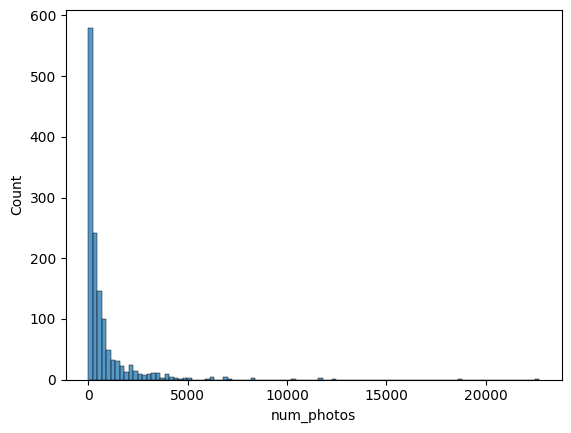

In [ ]:
sns.histplot(data_df['num_photos'],bins=100)
plt.show()

is_bus_web is_phone_number is_message_bus	

In [ ]:
data_df['is_bus_web'].isnull().sum(),data_df['is_phone_number'].isnull().sum(),data_df['is_message_bus'].isnull().sum()

(0, 0, 0)

In [ ]:
data_df['is_bus_web'].value_counts()

True     1048
False     300
Name: is_bus_web, dtype: int64

In [ ]:
# data_df[data_df['is_bus_web']==True]

In [ ]:
data_df['is_bus_web'] = data_df['is_bus_web'].apply(lambda x:1 if x==True else 0)

In [ ]:
data_df['is_phone_number'] = data_df['is_phone_number'].apply(lambda x:1 if x==True else 0)

In [ ]:
data_df['is_message_bus'] = data_df['is_message_bus'].apply(lambda x:1 if x==True else 0)

num_attributes

In [ ]:
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,65.929481,478 N Western Ave Los Angeles,CA,90004,Los Angeles,566.0,1,1,0,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,118.0,1,1,0,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1
3,25 DEGREES,7000 HOLLYWOOD BLVD,LOS ANGELES,FA0003187,CA,90028,OW0030706,RESTAURANT (31-60) SEATS HIGH RISK,92.131579,"F036,F030,F044,F026,F037,F027,F006,F004,F029,F...","# 36. Equipment, utensils and linens: storage ...",restaurant,31-60,HIGH,38,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,1453.0,1,1,0,24.0,NaN,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1
5,71 ABOVE,633 W 5TH ST # 7100,LOS ANGELES,FA0225306,CA,90071,OW0229647,RESTAURANT (151 + ) SEATS HIGH RISK,93.565217,"F033,F036,F006,F034,F038,F044,F039,F043,F025,F...",# 33. Nonfood-contact surfaces clean and in go...,restaurant,151 +,HIGH,217,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.500000,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,8236.0,1,1,0,35.0,See all 138 questions,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3


In [ ]:
mean_attributes = data_df['num_attributes'].mean()
# mean_attributes
data_df['num_attributes'].fillna(mean_attributes, inplace=True)
data_df['num_attributes'].isnull().sum()

0

num_questions

In [ ]:
data_df['num_questions'].isnull().sum()

739

In [ ]:
data_df['num_questions'].fillna(0, inplace=True)
data_df['num_questions'].isnull().sum()

0

In [ ]:
def extract_questions(x):
    if x==0:
        return 0
    else:
        x = x.strip('See all ')
        if 'questions' in x:
            x = x.strip(' questions')
            x = float(x)
        elif 'question' in x:
            x = x.strip(' question')
            x = float(x)
    return x

In [ ]:
data_df['num_questions'] = data_df['num_questions'].apply(lambda x:extract_questions(x))

comments_list	

In [ ]:
# !pip install transformers

In [ ]:
# from transformers import BertForSequenceClassification, BertTokenizer, TextClassificationPipeline
# model_path = "JiaqiLee/robust-bert-yelp"
# # model_path = 'textattack/bert-base-uncased-yelp-polarity'
# tokenizer = BertTokenizer.from_pretrained(model_path)
# model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)
# pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer)
# print(pipeline("Definitely a greasy spoon! Always packed here and always a wait but worth it."))

[{'label': 'positive', 'score': 0.9997605681419373}]


In [ ]:
# comments_list = data_df['comments_list'].values
# comments_list[0]

'["Hi, it\'s Pauly P here dropping a bomb review on Cafe One.\\n\\nAccessibility: unless you work around the area, it can be difficult to access by car.\\nHours: Monday to Friday normal business hours. Saturday half-day.\\nFood: Pretty good reviews from my coworkers. They have a wide variety of options ranging from salad to grilled food, I will post the menu here so you can take a peep. Don\'t expect flavor explosion or mouth dropping goodness but definitely good food for what it is. They also have fruits, chips, instant noodles, and other snack options here.\\nPrice: moderate pricings. I wouldn\'t say it\'s expensive or good bang-for-the-buck. Somewhere in between depending on what you get.\\nMy favorites: hamburger, breakfast burrito with bacon, steak burrito.\\nTips: call in to make an order ahead as they do get busy around lunch time; however they do work fairly fast.\\n\\nAlright, just want to drop a short, simple, and quick review. I mostly just wanted to post the menu. Give this

In [ ]:
# len(comments_list[0].split(' '))

641

In [ ]:
# print(pipeline(comments_list[0][:512]))

[{'label': 'positive', 'score': 0.9997770190238953}]


### Limitation: only allow to calculate the sentiment of the first 512 tokens

In [ ]:
# data_df['sentiment_bert'] = data_df['comments_list'].apply(lambda x: pipeline(x[:512]))

In [ ]:
# data_df['sentiment_bert'][0][0]['label']

'positive'

In [ ]:
# data_df['sentiment_bert'] = data_df['sentiment_bert'].apply(lambda x:x[0]['label'])

In [ ]:
# data_df['sentiment_bert'][0]

'positive'

In [ ]:
# data_df[data_df['comments_list'] =='positive']

In [ ]:
# data_df['sentiment_bert'] = data_df['sentiment_bert'].apply(lambda x:1 if x=='positive' else 0)

In [ ]:
# data_df.head(1)

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price,sentiment_bert
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,0.0,"[""Hi, it's Pauly P here dropping a bomb review...",low,0,7.0,1,1


Use textblob

In [ ]:
# !pip install textblob

In [ ]:
from textblob import TextBlob
# Sentiment Analysis
text = TextBlob("Python is a high-level, general-purpose programming language.")
print(text.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
data_df.comments_list[0]

'["Hi, it\'s Pauly P here dropping a bomb review on Cafe One.\\n\\nAccessibility: unless you work around the area, it can be difficult to access by car.\\nHours: Monday to Friday normal business hours. Saturday half-day.\\nFood: Pretty good reviews from my coworkers. They have a wide variety of options ranging from salad to grilled food, I will post the menu here so you can take a peep. Don\'t expect flavor explosion or mouth dropping goodness but definitely good food for what it is. They also have fruits, chips, instant noodles, and other snack options here.\\nPrice: moderate pricings. I wouldn\'t say it\'s expensive or good bang-for-the-buck. Somewhere in between depending on what you get.\\nMy favorites: hamburger, breakfast burrito with bacon, steak burrito.\\nTips: call in to make an order ahead as they do get busy around lunch time; however they do work fairly fast.\\n\\nAlright, just want to drop a short, simple, and quick review. I mostly just wanted to post the menu. Give this

In [ ]:
text = TextBlob(data_df.comments_list[0])
text.sentiment.polarity

0.2528022959183674

In [ ]:
data_df['polarity'] = data_df['comments_list'].apply(lambda x: TextBlob(x).polarity)

In [ ]:
data_df['subjectivity'] = data_df['comments_list'].apply(lambda x: TextBlob(x).subjectivity)

select features

In [ ]:
data_df.columns

Index(['FACILITY_NAME', 'FACILITY_ADDRESS', 'FACILITY_CITY', 'FACILITY_ID',
       'FACILITY_STATE', 'FACILITY_ZIP', 'OWNER_ID', 'PE_DESCRIPTION', 'SCORE',
       'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'type', 'size', 'risk_level',
       'ID', 'restaurant_id', 'url', 'name', 'address', 'score',
       'review_counts', 'price', 'category', 'open_time', 'amenities',
       'open_hours_week', 'new_address', 'state', 'zipcode', 'city',
       'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions', 'comments_list', 'binned_score',
       'coded_size', 'coded_review_counts', 'coded_price', 'polarity',
       'subjectivity'],
      dtype='object')

In [ ]:
data_segmentation = data_df[['restaurant_id', 'url','FACILITY_NAME', 'name', 'address', 'score',
       'review_counts', 'price', 'category', 'open_time', 'amenities',
       'open_hours_week', 'new_address', 'state', 'zipcode', 'city',
       'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions', 'comments_list', 'binned_score',
       'coded_size', 'coded_review_counts', 'coded_price', 'polarity',
       'subjectivity', 'size']]
data_segmentation

,restaurant_id,url,FACILITY_NAME,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price,polarity,subjectivity,size
0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,#1 CAFE,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,0.0,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1,0.252802,0.571214,0-30
1,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,#2 MOON BBQ,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,65.929481,478 N Western Ave Los Angeles,CA,90004,Los Angeles,566.0,1,1,0,19.0,16.0,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1,0.162304,0.538078,61-150
2,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 ASIAN KITCHEN INC,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,118.0,1,1,0,16.0,0.0,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1,0.106381,0.546583,0-30
3,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 DEGREES,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,1453.0,1,1,0,24.0,0.0,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1,0.266286,0.544767,31-60
5,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 ABOVE,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.500000,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,8236.0,1,1,0,35.0,138.0,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3,0.335909,0.612605,151 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,3832,https://www.yelp.com/biz/zamora-brothers-los-a...,ZAMORA BROS. MEAT MARKET,Zamora Brothers,"1559 W Pico Blvd Los Angeles, CA 90015",4.0,108 reviews,$,"Meat Shops, Mexican",Mon\n6:00 AM - 9:00 PM\nTue\n6:00 AM - 9:00 PM...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,1559 W Pico Blvd Los Angeles,CA,90015,Los Angeles,79.0,0,1,0,14.0,0.0,"['Came across this place on tik tok, finally h...",high,0,108.0,0,0.190191,0.527381,0-30
1393,3184,https://www.yelp.com/biz/zankou-chicken-hollyw...,ZANKOU CHICKEN,Zankou Chicken - Hollywood,"5065 W Sunset Blvd Los Angeles, CA 90027",3.5,1169 reviews,$$,Mediterranean,Mon\n10:00 AM - 12:00 AM (Next day)\nTue\n10:0...,Amenities and More\nHealth ScoreA\nOffers Deli...,65.929481,5065 W Sunset Blvd Los Angeles,CA,90027,Los Angeles,368.0,1,1,0,22.0,4.0,"[""I love this place cause the service is alwa...",high,2,1169.0,1,0.148343,0.559464,61-150
1394,3490,https://www.yelp.com/biz/zankou-chicken-los-an...,ZANKOU CHICKEN,Zankou Chicken,"7851 W Sunset Blvd Los Angeles, CA 90046",4.0,503 reviews,$$,"Mediterranean, Salad, Wraps",Mon\n10:00 AM - 10:00 PM\nTue\n10:00 AM - 10:0...,Amenities and More\nHealth ScoreA\nOffers Deli...,84.000000,7851 W Sunset Blvd Los Angeles,CA,90046,Los Angeles,409.0,1,1,1,22.0,4.0,"[""Came into Zankou around 930 wasn't too sure ...",high,1,503.0,

In [ ]:
data_segmentation.to_csv('features_for_segmentation_0403.csv', header=True,index=False)

In [ ]:
data_segmentation

,restaurant_id,url,FACILITY_NAME,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price,polarity,subjectivity,size
0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,#1 CAFE,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,0.0,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1,0.252802,0.571214,0-30
1,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,#2 MOON BBQ,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,65.929481,478 N Western Ave Los Angeles,CA,90004,Los Angeles,566.0,1,1,0,19.0,16.0,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1,0.162304,0.538078,61-150
2,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 ASIAN KITCHEN INC,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,118.0,1,1,0,16.0,0.0,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1,0.106381,0.546583,0-30
3,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 DEGREES,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,1453.0,1,1,0,24.0,0.0,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1,0.266286,0.544767,31-60
5,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 ABOVE,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.500000,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,8236.0,1,1,0,35.0,138.0,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3,0.335909,0.612605,151 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,219,https://www.yelp.com/biz/yamashiro-hollywood-h...,YAMASHIRO,Yamashiro Hollywood,"1999 N Sycamore Ave Hollywood, CA 90068",3.5,5258 reviews,$$$,"Japanese, Asian Fusion, American (New)",Mon\n5:00 PM - 11:00 PM\nTue\n5:00 PM - 11:00 ...,Amenities and More\nHealth ScoreA\nTakes Reser...,65.929481,1999 N Sycamore Ave Hollywood,CA,90068,Los Angeles,8600.0,1,1,1,32.0,189.0,['They are famous of their view overlooking th...,high,2,5258.0,2,0.258356,0.564443,151 +
1727,219,https://www.yelp.com/biz/yamashiro-hollywood-h...,YAMASHIRO MAIN/BANQUET BARS,Yamashiro Hollywood,"1999 N Sycamore Ave Hollywood, CA 90068",3.5,5258 reviews,$$$,"Japanese, Asian Fusion, American (New)",Mon\n5:00 PM - 11:00 PM\nTue\n5:00 PM - 11:00 ...,Amenities and More\nHealth ScoreA\nTakes Reser...,65.929481,1999 N Sycamore Ave Hollywood,CA,90068,Los Angeles,8583.0,1,1,1,32.0,189.0,['They are famous of their view overlooking th...,high,0,5258.0,2,0.258356,0.564443,0-30
1728,89,https://www.yelp.com/biz/yang-chow-los-angeles,YANG CHOW RESTAURANT,Yang Chow,"819 N Broadway Los Angeles, CA 90012",3.9,(3.1k reviews),$$,"Chinese, Seafood, Noodles",Mon\n11:30 AM - 8:30 PM\nTue\n11:30 AM - 8:30 ...,Amenities and More\nHealth ScoreA\nTakes Reser...,65.929481,819 N Broadway Los Angeles,CA,90012,Los Angeles,2700.0,1,1,0,24.0,22.0,['Customer service is out of t

In [ ]:
df = data_df[['score', 'open_hours_week', 'binned_score', 'coded_size', 'coded_review_counts', 
              'coded_price', 'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions',  'polarity', 'subjectivity']]
# tmp_df = data_df[['score', 'open_hours_week', 'binned_score', 'coded_size', 'coded_review_counts', 
#               'coded_price', 'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
#        'num_attributes', 'num_questions', 'sentiment_bert',
#        'polarity']] # add sentiment tomorrow

In [ ]:
df.to_csv('features.csv', header=True, index=False)

In [ ]:
df

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767
5,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,4.0,105.000000,high,0,108.0,0,79.0,0,1,0,14.0,0.0,0.190191,0.527381
1393,3.5,65.929481,high,2,1169.0,1,368.0,1,1,0,22.0,4.0,0.148343,0.559464
1394,4.0,84.000000,high,1,503.0,1,409.0,1,1,1,22.0,4.0,0.209066,0.555084
1395,4.0,89.000000,high,0,283.0,0,183.0,0,1,1,18.0,0.0,0.181992,0.497467


### EDA

some visualization

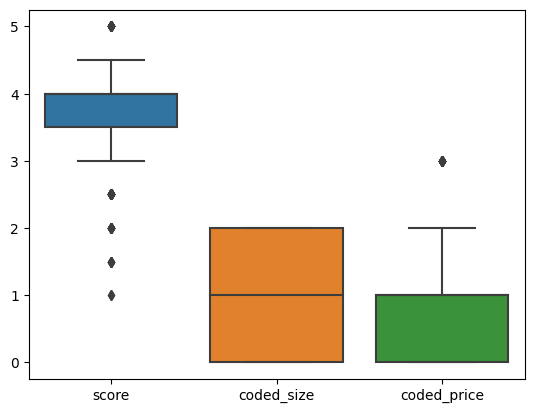

In [ ]:
sns.boxplot(data=df[["score",'coded_size','coded_price']], dodge=False)
plt.show()

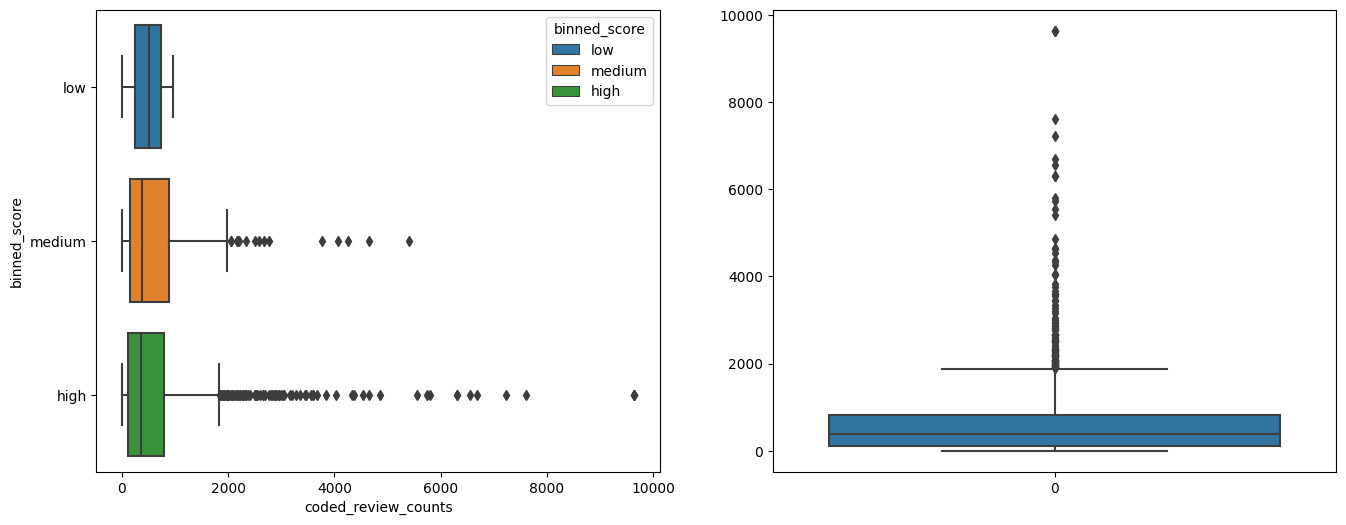

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(data=df, x='coded_review_counts', y='binned_score', hue='binned_score', dodge=False, ax=ax[0])
sns.boxplot(data=df['coded_review_counts'], dodge=False, ax=ax[1])

plt.show()

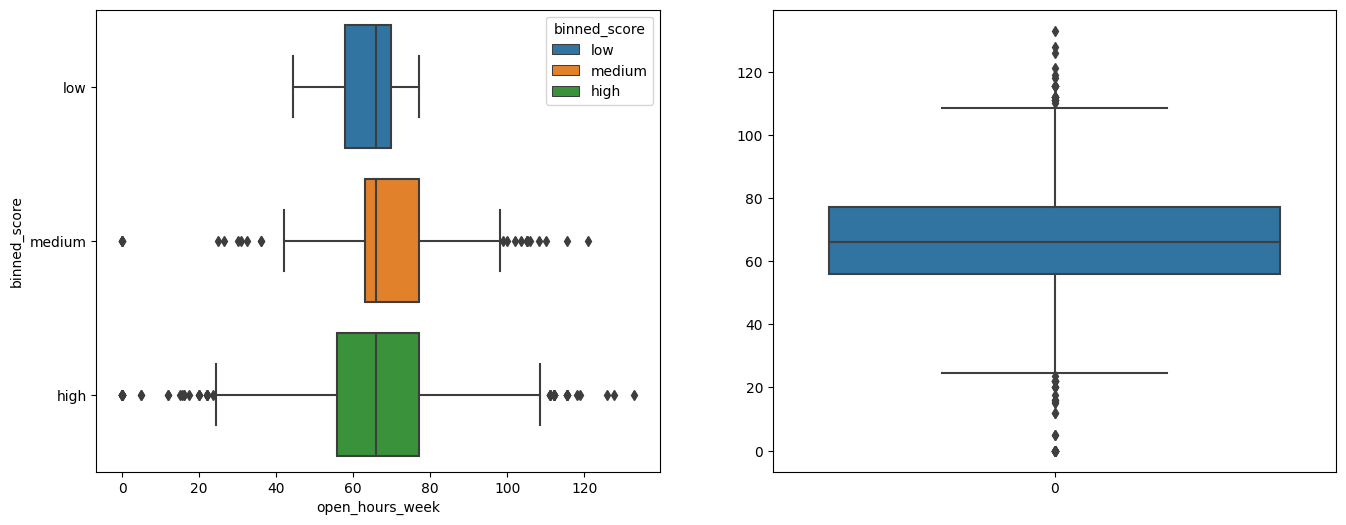

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(data=df, x='open_hours_week', y='binned_score', hue='binned_score', dodge=False, ax=ax[0])
sns.boxplot(data=df['open_hours_week'], dodge=False, ax=ax[1])

plt.show()

In [ ]:
df.head()

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767
5,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605


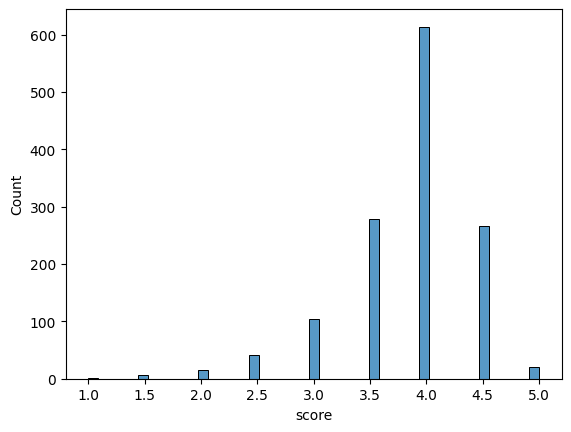

In [ ]:
sns.histplot(data=df, x='score')
plt.show()

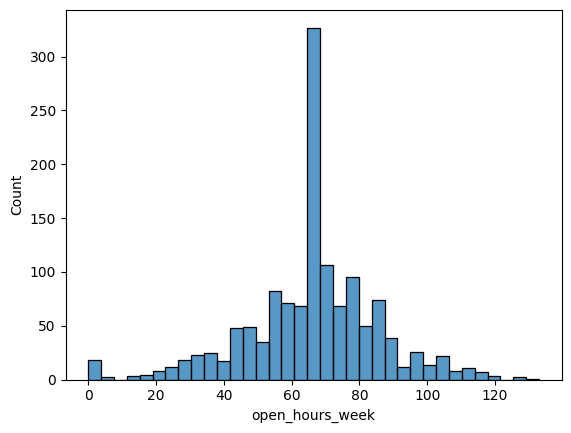

In [ ]:
sns.histplot(data=df, x='open_hours_week')
plt.show()

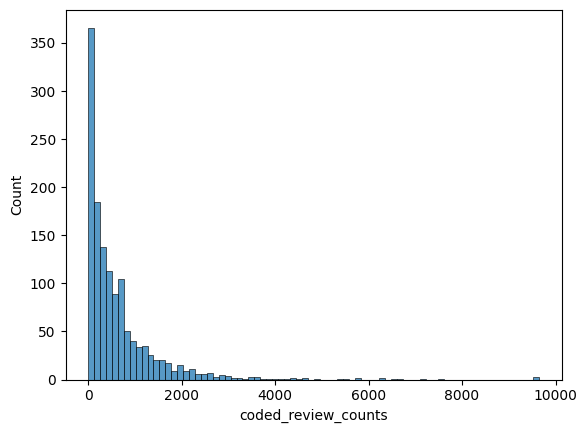

In [ ]:
sns.histplot(data=df, x='coded_review_counts')
plt.show()

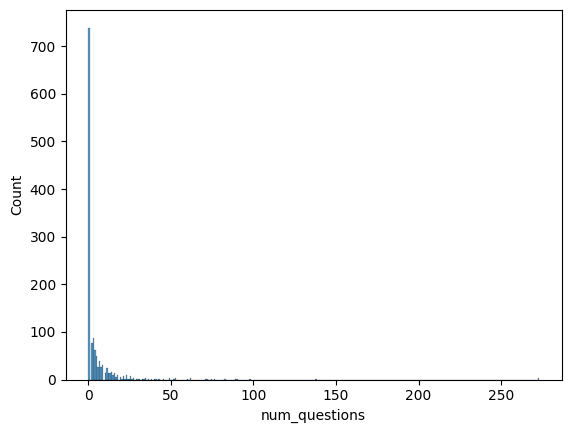

In [ ]:
sns.histplot(data=df, x='num_questions')
plt.show()

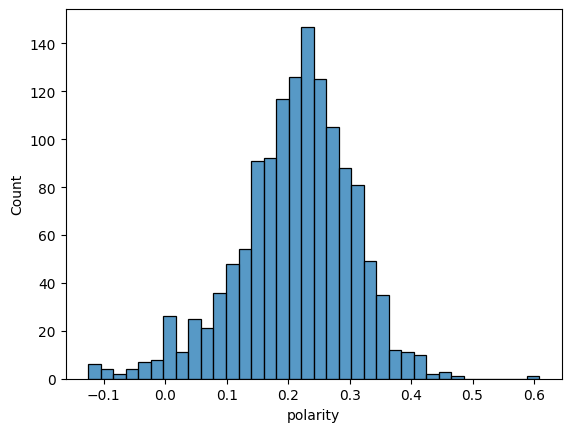

In [ ]:
sns.histplot(data=df, x='polarity')
plt.show()

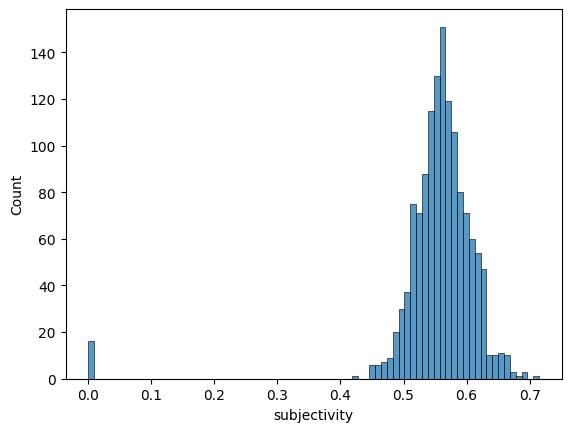

In [ ]:
sns.histplot(data=df, x='subjectivity')
plt.show()

check outliers

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return len(outliers)/len(df)

In [ ]:
df.columns

Index(['score', 'open_hours_week', 'binned_score', 'coded_size',
       'coded_review_counts', 'coded_price', 'num_photos', 'is_bus_web',
       'is_phone_number', 'is_message_bus', 'num_attributes', 'num_questions',
       'polarity', 'subjectivity'],
      dtype='object')

In [ ]:
for col in ['score', 'open_hours_week', 'coded_review_counts','num_photos', 'num_attributes', 'num_questions','polarity', 'subjectivity']:
    outlier_percent = find_outliers_IQR(df[col])
    print(f"{col} has {outlier_percent} outliers")

score has 0.06231454005934718 outliers
open_hours_week has 0.045252225519287835 outliers
coded_review_counts has 0.07492581602373888 outliers
num_photos has 0.10905044510385757 outliers
num_attributes has 0.012611275964391691 outliers
num_questions has 0.11795252225519288 outliers
polarity has 0.02373887240356083 outliers
subjectivity has 0.028931750741839762 outliers


Outliers less than or around 10%, we can keep them.

In [ ]:
df.head()

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767
5,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605


In [ ]:
sns.pairplot(df, hue='binned_score')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Modeling

since we have divided three levels with quantitles, we don't need to resample the classes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
# encode binned scores
# score_le = preprocessing.LabelEncoder()
# score_le.fit(df['binned_score'].unique())
# score_le.classes_
# df['binned_score_y'] = score_le.transform(df['binned_score'])
score_map = {'low':0, 'medium':1, 'high':2}
df['binned_score_y'] = df['binned_score'].apply(lambda x:score_map[x])

In [ ]:
df.head()

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2
5,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2


In [ ]:
df.dtypes

score                   float64
open_hours_week         float64
binned_score           category
coded_size                int64
coded_review_counts     float64
coded_price               int64
num_photos              float64
is_bus_web                int64
is_phone_number           int64
is_message_bus            int64
num_attributes          float64
num_questions           float64
polarity                float64
subjectivity            float64
binned_score_y         category
dtype: object

In [ ]:
df.columns

Index(['score', 'open_hours_week', 'binned_score', 'coded_size',
       'coded_review_counts', 'coded_price', 'num_photos', 'is_bus_web',
       'is_phone_number', 'is_message_bus', 'num_attributes', 'num_questions',
       'polarity', 'subjectivity', 'binned_score_y'],
      dtype='object')

In [ ]:
X = df.drop(columns=['binned_score','binned_score_y'])
y = df.binned_score_y

In [ ]:
X.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,3.5,65.929481,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214
1,3.0,65.929481,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078
2,3.5,65.929481,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583
3,3.5,105.000000,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767
5,4.0,34.500000,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605


One hot encoding

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
# dummy_y = np_utils.to_categorical(y_train)
uniques, ids = np.unique(y, return_inverse=True)
dummy_y = np_utils.to_categorical(y,len(uniques))
dummy_y.shape

(1676, 3)

In [ ]:
dummy_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, dummy_y, test_size=0.1, random_state=2009, stratify=dummy_y
)

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_val shape: {X_test.shape}")
print(f"Y_val shape: {y_test.shape}")

X_train shape: (1213, 13)
Y_train shape: (1213, 3)
X_val shape: (135, 13)
Y_val shape: (135, 3)


In [ ]:
X_train.shape[1]

13

In [ ]:
# np.array(X_train)
X_train.isnull().sum()

score                  0
open_hours_week        0
coded_size             0
coded_review_counts    0
coded_price            0
num_photos             0
is_bus_web             0
is_phone_number        0
is_message_bus         0
num_attributes         0
num_questions          0
polarity               0
subjectivity           0
dtype: int64

Firstly try not to rescale the data

In [ ]:
def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    history = history.history
    for ax, metric in zip(ax, ['loss', 'categorical_accuracy']):
        ax.plot(history[metric])
        ax.plot(history['val_'+metric])
        ax.legend([metric, 'val_'+metric])
        ax.set_title(metric)
    plt.show()

tip: can't handle missing values

In [ ]:
def model_basic(epochs, callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.3, seed=2009),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, callbacks=callbacks, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
epochs = 100

In [ ]:
hist_basic, model_basic = model_basic(epochs=epochs)

Epoch 1/100
38/38 [==============================] - 2s 23ms/step - loss: 25.0648 - categorical_accuracy: 0.7411 - val_loss: 20.6740 - val_categorical_accuracy: 0.8444
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 11.8236 - categorical_accuracy: 0.7428 - val_loss: 4.0371 - val_categorical_accuracy: 0.8444
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 9.1134 - categorical_accuracy: 0.7271 - val_loss: 5.0153 - val_categorical_accuracy: 0.8370
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 8.6694 - categorical_accuracy: 0.7609 - val_loss: 4.9862 - val_categorical_accuracy: 0.8444
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 6.5479 - categorical_accuracy: 0.7395 - val_loss: 4.7626 - val_categorical_accuracy: 0.4222
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 7.4804 - categorical_accuracy: 0.7411 - val_loss: 7.4612 - val_categorical_accuracy: 0.8444
Epoch

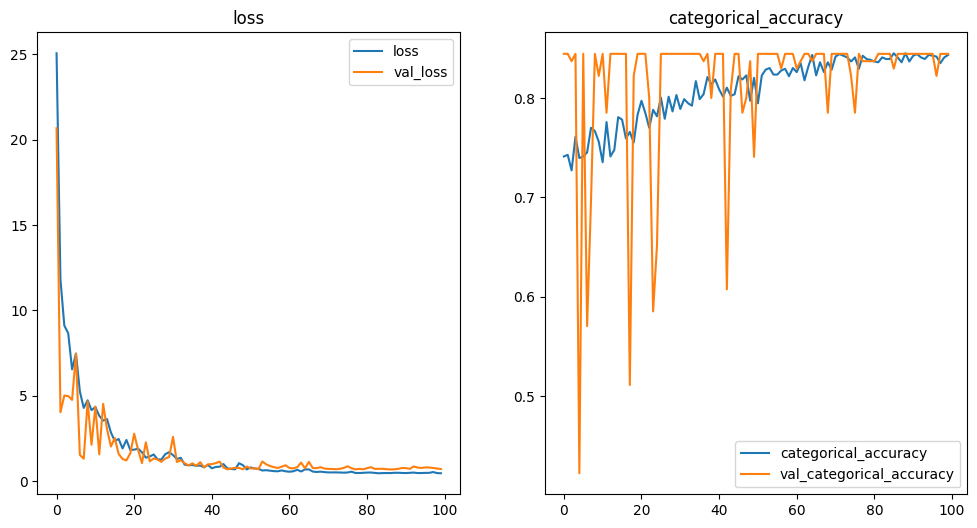

In [ ]:
plot(hist_basic)

In [ ]:
print(f"Training Set:   {model_basic.evaluate(X_train, y_train)}")
print(f"Validation Set: {model_basic.evaluate(X_test, y_test)}")

38/38 [==============================] - 0s 2ms/step - loss: 0.4381 - categorical_accuracy: 0.8508
Training Set:   [0.4380890727043152, 0.8507831692695618]
5/5 [==============================] - 0s 3ms/step - loss: 0.7159 - categorical_accuracy: 0.8444
Validation Set: [0.715913712978363, 0.8444444537162781]


try rescaling

In [ ]:
# df.drop(columns=['binned_score','binned_score_y'], inplace=True)

In [ ]:
mm = MinMaxScaler()
df_scaled = pd.DataFrame(mm.fit_transform(df.drop(columns=['binned_score','binned_score_y'])), columns = df.drop(columns=['binned_score','binned_score_y']).columns)

In [ ]:
df_scaled.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,0.625,0.495710,0.0,0.000622,0.333333,0.000793,0.0,1.0,0.0,0.069767,0.000000,0.580317,0.705203
1,0.500,0.495710,1.0,0.086754,0.333333,0.024945,1.0,1.0,0.0,0.418605,0.058608,0.473490,0.664294
2,0.625,0.495710,0.0,0.023943,0.333333,0.005201,1.0,1.0,0.0,0.348837,0.000000,0.407476,0.674793
3,0.625,0.789474,0.5,0.203669,0.333333,0.064037,1.0,1.0,0.0,0.534884,0.000000,0.596234,0.672552
4,0.750,0.259398,1.0,0.245647,1.000000,0.362979,1.0,1.0,0.0,0.790698,0.505495,0.678420,0.756302


In [ ]:
df_scaled.std()

score                  0.161826
open_hours_week        0.133223
coded_size             0.412233
coded_review_counts    0.105756
coded_price            0.201041
num_photos             0.070026
is_bus_web             0.414079
is_phone_number        0.145020
is_message_bus         0.344822
num_attributes         0.172971
num_questions          0.066630
polarity               0.117967
subjectivity           0.087699
dtype: float64

In [ ]:
## select some features
# X_scaled = df_scaled.drop(columns=['num_questions', 'open_hours_week', 'num_photos', 'coded_price', 'coded_review_counts'])
# X_scaled = df_scaled.drop(columns=['num_questions'])
# X_scaled = df_scaled[['score','coded_review_counts', 'num_photos', 'sentiment','coded_size']]
X_scaled = df_scaled

In [ ]:
# df.to_csv('features.csv', header=True, index=False)

In [ ]:
# df_scaled.to_csv('features_scaled.csv', header=True, index=False)

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, dummy_y, test_size=0.1, random_state=2009, stratify=dummy_y
)

In [ ]:
X_train_scaled.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
170,0.750,0.518797,0.0,0.031198,0.333333,0.010445,1.0,1.0,0.0,0.465116,0.000000,0.701193,0.748763
87,0.750,0.398496,0.0,0.012852,0.000000,0.003878,1.0,1.0,0.0,0.372093,0.000000,0.494585,0.636512
1300,0.625,0.616541,1.0,0.021973,0.333333,0.008859,1.0,1.0,0.0,0.418605,0.000000,0.596707,0.775632
1340,0.875,0.515038,1.0,0.241812,0.333333,0.107625,0.0,1.0,0.0,0.697674,0.084249,0.588092,0.714748
81,0.750,0.496241,1.0,0.263163,0.333333,0.096871,1.0,1.0,1.0,0.674419,0.047619,0.453459,0.761655


In [ ]:
def model_scaled(epochs, optimizer='adam', callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=2009),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        tf.keras.layers.Dropout(0.3, seed=2009),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=epochs, callbacks=callbacks, shuffle=True, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.SGD(learning_rate=0.005)

In [ ]:
hist_scaled, model_scaled = model_scaled(100, optimizer=opt)

Epoch 1/100
48/48 [==============================] - 1s 7ms/step - loss: 17.0732 - categorical_accuracy: 0.8084 - val_loss: 9.5288 - val_categorical_accuracy: 0.8571
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 5.9723 - categorical_accuracy: 0.8574 - val_loss: 3.2548 - val_categorical_accuracy: 0.8571
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0838 - categorical_accuracy: 0.8574 - val_loss: 1.2083 - val_categorical_accuracy: 0.8571
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.8675 - categorical_accuracy: 0.8574 - val_loss: 0.6273 - val_categorical_accuracy: 0.8571
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5451 - categorical_accuracy: 0.8574 - val_loss: 0.4836 - val_categorical_accuracy: 0.8571
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.4641 - categorical_accuracy: 0.8574 - val_loss: 0.4524 - val_categorical_accuracy: 0.8571
Epoch 7/1

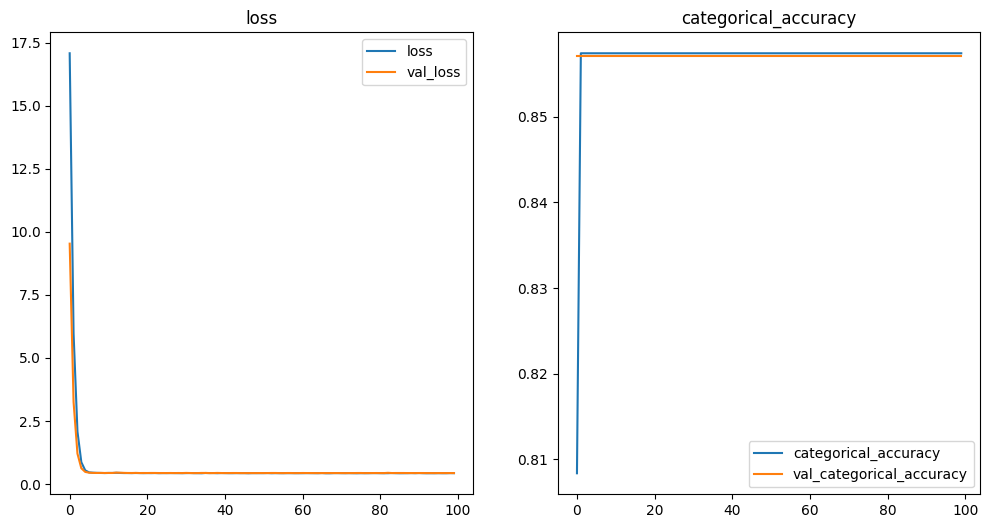

In [ ]:
plot(hist_scaled)

In [ ]:
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
# opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
print(f"Training Set:   {model_scaled.evaluate(X_train_scaled, y_train)}")
print(f"Validation Set: {model_scaled.evaluate(X_test_scaled, y_test)}")

48/48 [==============================] - 0s 2ms/step - loss: 0.4306 - categorical_accuracy: 0.8574
Training Set:   [0.4305606186389923, 0.8574270606040955]
6/6 [==============================] - 0s 3ms/step - loss: 0.4372 - categorical_accuracy: 0.8571
Validation Set: [0.4371924102306366, 0.8571428656578064]


In [ ]:
# predict probabilities for test set
yhat_probs = model_scaled.predict(X_test_scaled, verbose=0)
# predict crisp classes for test set
# yhat_classes = model_smote.predict_classes(X_test_smote, verbose=0)
yhat_classes=np.argmax(yhat_probs,axis=1)
yhat_classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# one_hot_map = {[0., 0., 1.]:2, [0., 1., 0.]:1, [1., 0., 0.]:0}
test_y_scaled = []
for dy in y_test:
    # print(dy[0],dy[1],dy[2])
    if dy[0]==1:
       test_y_scaled.append(0)
    elif dy[1]==1:
        test_y_scaled.append(1)
    elif dy[2]==1:
        test_y_scaled.append(2)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y_scaled, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y_scaled, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y_scaled, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_scaled, yhat_classes, average='macro')
print('F1 score: %f' % f1)
auc = roc_auc_score(test_y_scaled, yhat_probs, multi_class='ovo', average='macro')
print('ROC AUC: %f' % auc)

Accuracy: 0.857143
Precision: 0.285714
Recall: 0.333333
F1 score: 0.307692
ROC AUC: 0.475493


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sparse categorical crossentropy

In [ ]:
df.head()

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2
5,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2


In [ ]:
mm_sparse = MinMaxScaler()
df_scaled_sparse = pd.DataFrame(mm_sparse.fit_transform(df.drop(columns=['binned_score','binned_score_y'])), columns = df.drop(columns=['binned_score','binned_score_y']).columns)

In [ ]:
df_scaled_sparse.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,0.625,0.495710,0.0,0.000622,0.333333,0.000793,0.0,1.0,0.0,0.069767,0.000000,0.580317,0.705203
1,0.500,0.495710,1.0,0.086754,0.333333,0.024945,1.0,1.0,0.0,0.418605,0.058608,0.473490,0.664294
2,0.625,0.495710,0.0,0.023943,0.333333,0.005201,1.0,1.0,0.0,0.348837,0.000000,0.407476,0.674793
3,0.625,0.789474,0.5,0.203669,0.333333,0.064037,1.0,1.0,0.0,0.534884,0.000000,0.596234,0.672552
4,0.750,0.259398,1.0,0.245647,1.000000,0.362979,1.0,1.0,0.0,0.790698,0.505495,0.678420,0.756302


In [ ]:
# X_sparse = df_scaled_sparse.drop(columns = ['num_questions'])
X_sparse = df_scaled_sparse

In [ ]:
X_sparse.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,0.625,0.495710,0.0,0.000622,0.333333,0.000793,0.0,1.0,0.0,0.069767,0.000000,0.580317,0.705203
1,0.500,0.495710,1.0,0.086754,0.333333,0.024945,1.0,1.0,0.0,0.418605,0.058608,0.473490,0.664294
2,0.625,0.495710,0.0,0.023943,0.333333,0.005201,1.0,1.0,0.0,0.348837,0.000000,0.407476,0.674793
3,0.625,0.789474,0.5,0.203669,0.333333,0.064037,1.0,1.0,0.0,0.534884,0.000000,0.596234,0.672552
4,0.750,0.259398,1.0,0.245647,1.000000,0.362979,1.0,1.0,0.0,0.790698,0.505495,0.678420,0.756302


In [ ]:
y

0       2
1       2
2       2
3       2
5       2
       ..
1726    2
1727    2
1728    2
1729    2
1730    2
Name: binned_score_y, Length: 1676, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
X_train_sparse, X_test_sparse, y_train_sparse, y_test_sparse = train_test_split(
    X_sparse, y, test_size=0.1, random_state=2009, stratify=y
)

In [ ]:
X_train_sparse.shape

(1508, 13)

In [ ]:
y_train_sparse

46      2
924     2
298     1
680     2
733     2
       ..
1175    2
1076    2
1034    2
647     2
1667    2
Name: binned_score_y, Length: 1508, dtype: category
Categories (3, int64): [0 < 1 < 2]

https://datascience.stackexchange.com/questions/116692/accuracy-vs-categorical-accuracy

In [ ]:
def model_scaled_sparse(epochs, optimizer='adam', callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train_sparse.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=2009),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        # tf.keras.layers.Dropout(0.2, seed=2009),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_sparse, y_train_sparse, validation_data=(X_test_sparse, y_test_sparse), epochs=epochs, callbacks=callbacks, shuffle=True, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

In [ ]:
hist_scaled_sparse, model_scaled_sparse = model_scaled_sparse(30, optimizer=opt)

Epoch 1/30
48/48 [==============================] - 1s 5ms/step - loss: 0.8932 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.5141 - val_sparse_categorical_accuracy: 0.8571
Epoch 2/30
48/48 [==============================] - 0s 3ms/step - loss: 0.4813 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8571
Epoch 3/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4589 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4426 - val_sparse_categorical_accuracy: 0.8571
Epoch 4/30
48/48 [==============================] - 0s 3ms/step - loss: 0.4407 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4385 - val_sparse_categorical_accuracy: 0.8571
Epoch 5/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4506 - val_sparse_categorical_accuracy: 0.8571
Epoch 6/30
48/48 [==============================] - 0s 2ms/step - loss: 0.4411 - sparse_categorical_accuracy: 

In [ ]:
# plot(hist_scaled_sparse)

In [ ]:
print(f"Training Set:   {model_scaled_sparse.evaluate(X_train_sparse, y_train_sparse)}")
print(f"Validation Set: {model_scaled_sparse.evaluate(X_test_sparse, y_test_sparse)}")

48/48 [==============================] - 0s 1ms/step - loss: 0.4248 - sparse_categorical_accuracy: 0.8574
Training Set:   [0.4247733950614929, 0.8574270606040955]
6/6 [==============================] - 0s 2ms/step - loss: 0.4354 - sparse_categorical_accuracy: 0.8571
Validation Set: [0.43542444705963135, 0.8571428656578064]


In [ ]:
# predict probabilities for test set
yhat_probs = model_scaled_sparse.predict(X_test_scaled, verbose=0)
# predict crisp classes for test set
# yhat_classes = model_smote.predict_classes(X_test_smote, verbose=0)
yhat_classes=np.argmax(yhat_probs,axis=1)
yhat_classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y_scaled, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y_scaled, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y_scaled, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_scaled, yhat_classes, average='macro')
print('F1 score: %f' % f1)
auc = roc_auc_score(test_y_scaled, yhat_probs, multi_class='ovo', average='macro')
print('ROC AUC: %f' % auc)

Accuracy: 0.857143
Precision: 0.285714
Recall: 0.333333
F1 score: 0.307692
ROC AUC: 0.506894


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


use standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('features.csv')

In [ ]:
# df

In [ ]:
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df.drop(columns=['binned_score'])), columns=df.drop(columns=['binned_score']).columns)

In [ ]:
# df_std.drop(columns=['binned_score_y'],inplace=True)

In [ ]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    df_std, y, test_size=0.1, random_state=2009, stratify=y
)

In [ ]:
X_train_std.std()

score                  0.995762
open_hours_week        0.994608
coded_size             0.997510
coded_review_counts    1.019424
coded_price            0.994423
num_photos             1.017696
is_bus_web             1.002374
is_phone_number        1.009477
is_message_bus         0.990444
num_attributes         1.006976
num_questions          1.037154
polarity               1.004265
subjectivity           1.014985
dtype: float64

In [ ]:
# X_train_std = X_train_std.drop(columns=['num_questions'])
# X_test_std = X_test_std.drop(columns=['num_questions'])

In [ ]:
y_train_std

46      2
924     2
298     1
680     2
733     2
       ..
1175    2
1076    2
1034    2
647     2
1667    2
Name: binned_score_y, Length: 1508, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
def model_std_sparse(epochs, optimizer='adam', callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train_std.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=2009),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
        tf.keras.layers.Dropout(0.2, seed=2009),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), epochs=epochs, callbacks=callbacks, shuffle=True, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

In [ ]:
hist_std_sparse, model_std_sparse = model_std_sparse(50, optimizer=opt)

Epoch 1/50
48/48 [==============================] - 1s 7ms/step - loss: 1.9681 - sparse_categorical_accuracy: 0.8369 - val_loss: 0.5212 - val_sparse_categorical_accuracy: 0.8571
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4969 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4648 - val_sparse_categorical_accuracy: 0.8571
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4556 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4643 - val_sparse_categorical_accuracy: 0.8571
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4734 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4586 - val_sparse_categorical_accuracy: 0.8571
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4543 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.4549 - val_sparse_categorical_accuracy: 0.8571
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4500 - sparse_categorical_accuracy: 

In [ ]:
# plot(hist_std_sparse)

todo: rename the variables, use call backs to store the model

### upsample the dataset using SMOTE

In [ ]:
# !pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.binned_score.value_counts()

high      1437
medium     231
low          8
Name: binned_score, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop(columns=['binned_score','binned_score_y'])
y = df.binned_score

In [ ]:
mm_smote = MinMaxScaler()
X_scaled_smote = pd.DataFrame(mm_smote.fit_transform(X), columns = X.columns)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_scaled_smote, y, test_size=0.1, random_state=2009, stratify=y
)

In [ ]:
X_scaled_smote

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,0.625,0.495710,0.0,0.000622,0.333333,0.000793,0.0,1.0,0.0,0.069767,0.000000,0.580317,0.705203
1,0.500,0.495710,1.0,0.086754,0.333333,0.024945,1.0,1.0,0.0,0.418605,0.058608,0.473490,0.664294
2,0.625,0.495710,0.0,0.023943,0.333333,0.005201,1.0,1.0,0.0,0.348837,0.000000,0.407476,0.674793
3,0.625,0.789474,0.5,0.203669,0.333333,0.064037,1.0,1.0,0.0,0.534884,0.000000,0.596234,0.672552
4,0.750,0.259398,1.0,0.245647,1.000000,0.362979,1.0,1.0,0.0,0.790698,0.505495,0.678420,0.756302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0.625,0.495710,1.0,0.544880,0.666667,0.379022,1.0,1.0,1.0,0.720930,0.692308,0.586874,0.696843
1672,0.625,0.495710,0.0,0.544880,0.666667,0.378272,1.0,1.0,1.0,0.720930,0.692308,0.586874,0.696843
1673,0.725,0.495710,1.0,0.321206,0.333333,0.118995,1.0,1.0,0.0,0.534884,0.080586,0.616985,0.643751
1674,0.100,0.495710,0.0,0.001451,0.000000,0.001631,1.0,1.0,0.0,0.093023,0.000000,0.140757,0.685800


In [ ]:
y_train_smote.value_counts()

high      1293
medium     208
low          7
Name: binned_score, dtype: int64

In [ ]:
# transform the dataset, upsample only the trainning set
oversample = SMOTE(random_state=2009, k_neighbors=5)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_smote, y_train_smote)

In [ ]:
X_train_smote.std()

score                  0.125088
open_hours_week        0.105872
coded_size             0.371473
coded_review_counts    0.082563
coded_price            0.155504
num_photos             0.049905
is_bus_web             0.450693
is_phone_number        0.103771
is_message_bus         0.262210
num_attributes         0.137943
num_questions          0.047404
polarity               0.116162
subjectivity           0.181831
dtype: float64

In [ ]:
y_train_smote.value_counts()

high      1293
medium    1293
low       1293
Name: binned_score, dtype: int64

In [ ]:
# uniques, ids = np.unique(y, return_inverse=True)
# dummy_y = np_utils.to_categorical(y,len(uniques))
# dummy_y.shape

score_map = {'low':0, 'medium':1, 'high':2}
y_train_smote = np.array([score_map[x] for x in y_train_smote])
y_train_smote

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
score_map = {'low':0, 'medium':1, 'high':2}
y_test_smote = np.array([score_map[x] for x in y_test_smote])
y_test_smote

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2])

In [ ]:
from collections import Counter
counter = Counter(y_train_smote)
print(counter)

Counter({2: 1293, 1: 1293, 0: 1293})


In [ ]:
X_train_smote

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,0.750000,0.578947,0.0,0.003109,0.000000,0.000661,0.0,1.0,0.0,0.302326,0.000000,0.567325,0.635551
1,0.625000,0.526316,1.0,0.043429,0.333333,0.011062,1.0,1.0,1.0,0.697674,0.000000,0.528808,0.665283
2,0.750000,0.409774,1.0,0.161070,0.333333,0.129705,1.0,1.0,0.0,0.813953,0.018315,0.626266,0.681152
3,0.750000,0.639098,0.0,0.006012,0.000000,0.007580,0.0,1.0,0.0,0.255814,0.000000,0.459818,0.630740
4,0.250000,0.495710,0.5,0.007877,0.000000,0.002027,1.0,1.0,0.0,0.302326,0.000000,0.159308,0.663707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,0.836948,0.495710,1.0,0.043816,0.666667,0.028936,0.0,1.0,0.0,0.442887,0.059098,0.530084,0.655671
3875,0.750000,0.660826,0.0,0.150200,0.333333,0.082319,1.0,1.0,0.0,0.661495,0.024689,0.525453,0.719013
3876,0.576277,0.530445,0.5,0.033344,0.333333,0.017512,0.0,1.0,0.0,0.383534,0.011176,0.591290,0.657461
3877,0.629567,0.495710,0.0,0.001478,0.333333,0.000325,0.0,1.0,0.0,0.233408,0.000000,0.559071,0.704286


In [ ]:
Counter(y_train_smote)

Counter({2: 1293, 1: 1293, 0: 1293})

In [ ]:
Counter(y_test_smote)

Counter({2: 144, 1: 23, 0: 1})

In [ ]:
def model_smote_sparse(epochs, optimizer='adam', callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train_smote.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=2009),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        tf.keras.layers.Dropout(0.2, seed=2009),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_smote, y_train_smote, validation_data=(X_test_smote, y_test_smote), epochs=epochs, callbacks=callbacks, shuffle=True, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

In [ ]:
hist_smote_sparse, model_smote_sparse = model_smote_sparse(50, optimizer=opt)

Epoch 1/50
122/122 [==============================] - 1s 4ms/step - loss: 1.2436 - accuracy: 0.4921 - val_loss: 1.0026 - val_accuracy: 0.2619
Epoch 2/50
122/122 [==============================] - 0s 3ms/step - loss: 0.8965 - accuracy: 0.5496 - val_loss: 1.0583 - val_accuracy: 0.2440
Epoch 3/50
122/122 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.5790 - val_loss: 0.8407 - val_accuracy: 0.6071
Epoch 4/50
122/122 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.5844 - val_loss: 0.7991 - val_accuracy: 0.6726
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 0.8046 - accuracy: 0.5909 - val_loss: 0.8561 - val_accuracy: 0.6845
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.6030 - val_loss: 0.9908 - val_accuracy: 0.5000
Epoch 7/50
122/122 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.6056 - val_loss: 0.9775 - val_accuracy: 0.2500
Epoch 

In [ ]:
# plot(hist_smote_sparse)

In [ ]:
print(f"Training Set:   {model_smote_sparse.evaluate(X_train_smote, y_train_smote)}")
print(f"Validation Set: {model_smote_sparse.evaluate(X_test_smote, y_test_smote)}")

122/122 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7040
Training Set:   [0.5548378229141235, 0.704047441482544]
6/6 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.3214
Validation Set: [0.8171988129615784, 0.3214285671710968]


In [ ]:
# predict probabilities for test set
yhat_probs = model_smote_sparse.predict(X_test_smote, verbose=0)
# predict crisp classes for test set
# yhat_classes = model_smote.predict_classes(X_test_smote, verbose=0)
yhat_classes=np.argmax(yhat_probs,axis=1)
# yhat_classes

In [ ]:
accuracy = accuracy_score(y_test_smote, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_smote, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_smote, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_smote, yhat_classes, average='macro')
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test_smote, yhat_probs, multi_class='ovo', average='macro')
print('ROC AUC: %f' % auc)

Accuracy: 0.321429
Precision: 0.357684
Recall: 0.356381
F1 score: 0.213791
ROC AUC: 0.658917


one hot encoding

In [ ]:
Counter(y)

Counter({'high': 1143, 'medium': 198, 'low': 7})

In [ ]:
# numerical_y = []

In [ ]:
uniques, ids = np.unique(df.binned_score_y, return_inverse=True)
dummy_y_smote = np_utils.to_categorical(df.binned_score_y,len(uniques))
dummy_y_smote.shape

(1348, 3)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_scaled_smote, dummy_y_smote, test_size=0.1, random_state=2009, stratify=dummy_y_smote
)

In [ ]:
y_train_smote.shape

(1213, 3)

In [ ]:
# transform the dataset, upsample only the trainning set
oversample = SMOTE(random_state=2009, k_neighbors=5)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_smote, y_train_smote)

In [ ]:
y_train_smote.shape

(3087, 3)

In [ ]:
X_test_smote

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
1151,0.875,0.631579,0.0,0.058147,0.333333,0.036888,1.0,1.0,0.0,0.744186,0.000000,0.602333,0.791261
1141,0.875,0.451128,0.0,0.009017,0.000000,0.003702,0.0,1.0,1.0,0.348837,0.000000,0.677367,0.803322
443,0.625,0.495710,0.5,0.023735,0.666667,0.013486,1.0,1.0,0.0,0.395349,0.025641,0.374517,0.722533
1277,0.750,0.473684,0.0,0.063433,0.000000,0.055972,1.0,1.0,0.0,0.418605,0.007326,0.544130,0.775241
961,0.750,0.495710,0.0,0.013371,0.000000,0.005112,0.0,1.0,1.0,0.302326,0.000000,0.437376,0.662820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.875,0.563910,0.0,0.035759,0.333333,0.009167,1.0,1.0,0.0,0.674419,0.010989,0.502140,0.871154
698,0.750,0.495710,0.0,0.000104,0.000000,0.000000,0.0,0.0,0.0,0.046512,0.000000,0.504233,0.720937
624,0.500,0.526316,1.0,0.065195,0.333333,0.022477,1.0,1.0,0.0,0.558140,0.102564,0.401272,0.712906
340,0.500,0.684211,1.0,0.136505,0.333333,0.038519,1.0,1.0,0.0,0.465116,0.014652,0.407380,0.766142


In [ ]:
def model_scaled_smote(epochs, optimizer='adam', callbacks=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train_smote.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=2009),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        tf.keras.layers.Dropout(0.3, seed=2009),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_smote, y_train_smote, validation_data=(X_test_smote, y_test_smote), epochs=epochs, callbacks=callbacks, shuffle=True, verbose=1)
    # print(model.summary())
    return history, model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

In [ ]:
hist_smote, model_smote = model_scaled_smote(100, optimizer=opt)

Epoch 1/100
97/97 [==============================] - 2s 5ms/step - loss: 3.3996 - categorical_accuracy: 0.3560 - val_loss: 1.0822 - val_categorical_accuracy: 0.4296
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 1.0849 - categorical_accuracy: 0.4270 - val_loss: 1.0514 - val_categorical_accuracy: 0.3852
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 1.0406 - categorical_accuracy: 0.4801 - val_loss: 1.1266 - val_categorical_accuracy: 0.2963
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 0.9849 - categorical_accuracy: 0.5274 - val_loss: 1.2032 - val_categorical_accuracy: 0.1481
Epoch 5/100
97/97 [==============================] - 1s 6ms/step - loss: 0.9530 - categorical_accuracy: 0.5335 - val_loss: 0.9803 - val_categorical_accuracy: 0.4148
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 0.9223 - categorical_accuracy: 0.5575 - val_loss: 0.9996 - val_categorical_accuracy: 0.2815
Epoch 7/10

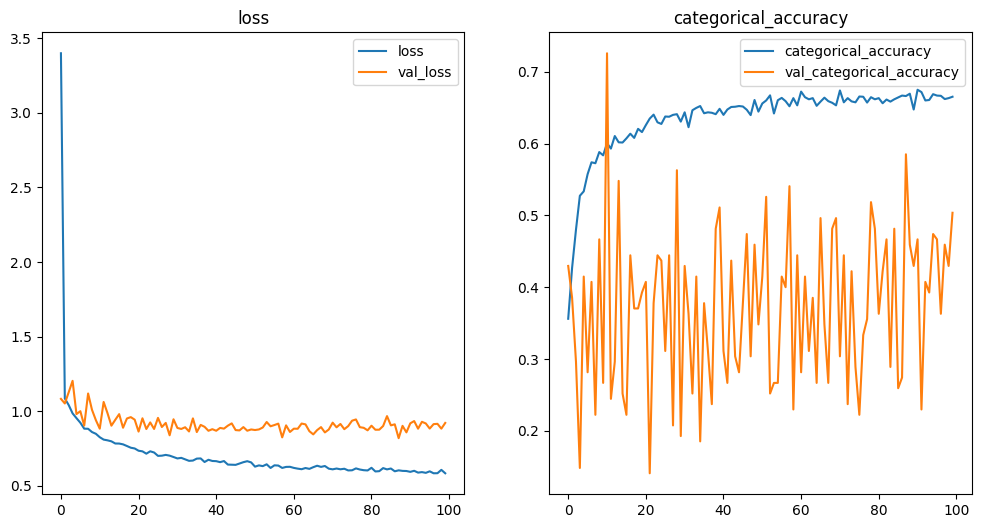

In [ ]:
plot(hist_smote)

In [ ]:
print(f"Training Set:   {model_smote.evaluate(X_train_smote, y_train_smote)}")
print(f"Validation Set: {model_smote.evaluate(X_test_smote, y_test_smote)}")

97/97 [==============================] - 0s 2ms/step - loss: 0.5478 - categorical_accuracy: 0.6744
Training Set:   [0.5478107333183289, 0.6744412183761597]
5/5 [==============================] - 0s 3ms/step - loss: 0.9209 - categorical_accuracy: 0.5037
Validation Set: [0.9208626747131348, 0.5037037134170532]


In [ ]:
# predict probabilities for test set
yhat_probs = model_smote.predict(X_test_smote, verbose=0)
# predict crisp classes for test set
# yhat_classes = model_smote.predict_classes(X_test_smote, verbose=0)
yhat_classes=np.argmax(yhat_probs,axis=1)
# yhat_classes

array([1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1])

In [ ]:
# one_hot_map = {[0., 0., 1.]:2, [0., 1., 0.]:1, [1., 0., 0.]:0}
test_y_smote = []
for dy in y_test_smote:
    # print(dy[0],dy[1],dy[2])
    if dy[0]==1:
       test_y_smote.append(0)
    elif dy[1]==1:
        test_y_smote.append(1)
    elif dy[2]==1:
        test_y_smote.append(2)

In [ ]:
dummy_y_smote[76]

array([1., 0., 0.], dtype=float32)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y_smote, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y_smote, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y_smote, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_smote, yhat_classes, average='macro')
print('F1 score: %f' % f1)
auc = roc_auc_score(test_y_smote, yhat_probs, multi_class='ovo', average='macro')
print('ROC AUC: %f' % auc)

Accuracy: 0.503704
Precision: 0.368357
Recall: 0.377485
F1 score: 0.308106
ROC AUC: 0.537573
